In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

<div style="font-size: 30px; color: white;">
    <ul>
        WEEK 1.
</div>

In [43]:
df = pd.read_csv("dataset.csv", delimiter=';')

df.head()


,id,team_a_mot_x_pos,team_b_mot_x_pos,team_a_ppg_dif_l4,team_a_ppg_dif_l6,team_b_ppg_dif_l4,team_b_ppg_dif_l6,team_a_ratio_shotsOnTarget_overall,team_a_ratio_shotsOnTarget_l4,team_a_ratio_shotsOnTarget_l6,...,team_b_shots_overall_l6_TSR,HomeWin,Draw,AwayWin,odds_ft_1,odds_ft_x,odds_ft_2,profit_1,profit_x,profit_2
0,2215,0.15,0.12,0.888889,1.0,1.0,1.0,0.545455,0.534483,0.545455,...,0.49,0,1,0,1.83,3.70,4.66,-100.0,270.0,-100.0
1,2216,0.15,0.14,2.000000,1.0,0.6,1.0,0.397059,0.441176,0.397059,...,0.59,0,0,1,6.49,4.43,1.54,-100.0,-100.0,54.0
2,2217,0.12,0.11,12.000000,1.0,1.5,1.0,0.441860,0.458333,0.441860,...,0.66,0,0,1,7.50,4.58,1.47,-100.0,-100.0,47.0
3,2218,0.17,0.10,2.000000,1.0,1.6,1.0,0.442308,0.361111,0.442308,...,0.58,0,1,0,2.64,3.26,2.90,-100.0,226.0,-100.0
4,2219,0.13,0.11,0.333333,1.0,1.0,1.0,0.523077,0.581818,0.523077,...,0.42,0,1,0,2.29,3.42,3.32,-100.0,242.0,-100.0


In [44]:
df.columns


Index(['id', 'team_a_mot_x_pos', 'team_b_mot_x_pos', 'team_a_ppg_dif_l4',
       'team_a_ppg_dif_l6', 'team_b_ppg_dif_l4', 'team_b_ppg_dif_l6',
       'team_a_ratio_shotsOnTarget_overall', 'team_a_ratio_shotsOnTarget_l4',
       'team_a_ratio_shotsOnTarget_l6', 'team_b_ratio_shotsOnTarget_overall',
       'team_b_ratio_shotsOnTarget_l4', 'team_b_ratio_shotsOnTarget_l6',
       'predict_xg_overall_team_a', 'predict_xg_overall_team_b',
       'predict_xg_home_team_a', 'predict_xg_away_team_b',
       'team_a_xg_last4_prematch', 'team_b_xg_last4_prematch',
       'team_a_xga_last4_prematch', 'team_b_xga_last4_prematch',
       'position_a_prematch', 'position_b_prematch', 'division',
       'team_a_shots_average', 'team_b_shots_average',
       'team_a_shots_average_l4', 'team_b_shots_average_l4',
       'team_a_shots_average_l6', 'team_b_shots_average_l6',
       'team_a_shots_overall_TSR', 'team_b_shots_overall_TSR',
       'team_a_shots_overall_l4_TSR', 'team_b_shots_overall_l4_TSR',
 

In [45]:
# Checking for Missing Values
missing_values = df.isnull().sum()

missing_values

id                                     0
team_a_mot_x_pos                       0
team_b_mot_x_pos                       0
team_a_ppg_dif_l4                      0
team_a_ppg_dif_l6                      0
team_b_ppg_dif_l4                      0
team_b_ppg_dif_l6                      0
team_a_ratio_shotsOnTarget_overall     1
team_a_ratio_shotsOnTarget_l4         13
team_a_ratio_shotsOnTarget_l6         13
team_b_ratio_shotsOnTarget_overall     1
team_b_ratio_shotsOnTarget_l4         12
team_b_ratio_shotsOnTarget_l6         11
predict_xg_overall_team_a              0
predict_xg_overall_team_b              0
predict_xg_home_team_a                 2
predict_xg_away_team_b                 2
team_a_xg_last4_prematch               8
team_b_xg_last4_prematch               8
team_a_xga_last4_prematch              8
team_b_xga_last4_prematch              8
position_a_prematch                    0
position_b_prematch                    0
division                               0
team_a_shots_ave

In [46]:
df.shape

(57819, 45)

In [47]:
df = df.dropna()

df.shape

(57783, 45)

In [48]:
# Extracting the basic statistics of each column.
stats = df.describe()

stats

,id,team_a_mot_x_pos,team_b_mot_x_pos,team_a_ppg_dif_l4,team_a_ppg_dif_l6,team_b_ppg_dif_l4,team_b_ppg_dif_l6,team_a_ratio_shotsOnTarget_overall,team_a_ratio_shotsOnTarget_l4,team_a_ratio_shotsOnTarget_l6,...,team_b_shots_overall_l6_TSR,HomeWin,Draw,AwayWin,odds_ft_1,odds_ft_x,odds_ft_2,profit_1,profit_x,profit_2
count,5.778300e+04,57783.000000,57783.000000,57783.000000,57783.000000,57783.000000,57783.000000,57783.000000,57783.000000,57783.000000,...,57783.000000,57783.000000,57783.000000,57783.000000,57783.000000,57783.000000,57783.000000,57783.000000,57783.000000,57783.000000
mean,1.032846e+06,0.449403,0.449135,1.348267,1.298531,1.313531,1.277245,0.439077,0.442692,0.441597,...,0.502602,0.433847,0.265701,0.300452,2.949085,3.732388,4.219176,-6.576882,-6.783846,-11.264576
std,6.960253e+05,0.234683,0.234520,1.279845,1.262324,1.226279,1.221932,0.068748,0.100706,0.094287,...,0.084637,0.495609,0.441710,0.458458,12.235895,1.398607,11.868284,123.293775,159.806570,160.580358
min,2.215000e+03,0.050000,0.050000,0.030000,0.028000,0.023333,0.030000,-3.000000,-3.000000,-3.000000,...,-5.000000,0.000000,0.000000,0.000000,1.010000,0.000000,1.000000,-100.000000,-100.000000,-100.000000
25%,4.931555e+05,0.270000,0.270000,0.666667,0.710769,0.666667,0.709091,0.396552,0.378378,0.385714,...,0.460000,0.000000,0.000000,0.000000,1.790000,3.200000,2.450000,-100.000000,-100.000000,-100.000000
50%,1.029382e+06,0.420000,0.420000,1.000000,1.000000,1.000000,1.000000,0.438127,0.440000,0.439394,...,0.500000,0.000000,0.000000,0.000000,2.250000,3.440000,3.200000,-100.000000,-100.000000,-100.000000
75%,1.282522e+06,0.590000,0.590000,1.480000,1.428000,1.450000,1.404000,0.480392,0.500000,0.495413,...,0.550000,1.000000,1.000000,1.000000,2.880000,3.800000,4.450000,85.000000,185.000000,75.000000
max,2.982689e+06,2.030000,1.970000,12.000000,18.000000,12.000000,18.000000,5.000000,3.000000,5.000000,...,3.000000,1.000000,1.000000,1.000000,501.000000,51.000000,501.000000,1650.000000,1350.000000,2500.000000


In [49]:
# Encoding result based on HomeWin, Draw, and AwayWin columns
def encode_result(row):
    if row['HomeWin'] == 1:
        return 1  
    elif row['Draw'] == 1:
        return 0  
    elif row['AwayWin'] == 1:
        return 2  

# Apply the encoding to create a new 'result' column
df['result'] = df.apply(encode_result, axis=1)

# Check the updated dataframe
print(df[['HomeWin', 'Draw', 'AwayWin', 'result']].head())

   HomeWin  Draw  AwayWin  result
0        0     1        0       0
1        0     0        1       2
2        0     0        1       2
3        0     1        0       0
4        0     1        0       0


In [50]:
# No need for these columns right now.
df = df.drop(columns=['HomeWin', 'Draw', 'AwayWin', 'division'])

df.shape

(57783, 42)

In [51]:
# Those columns can not be negative. Since we saw some entries.
columns_non_negative = [
    'team_a_shots_overall_TSR', 
    'team_b_shots_overall_TSR',
    'team_a_shots_overall_l4_TSR',
    'team_b_shots_overall_l4_TSR',
    'team_a_shots_overall_l6_TSR',
    'team_b_shots_overall_l6_TSR',
]

# Filter out rows with negative values in the specified columns
invalid_rows = (df[columns_non_negative] < 0).any(axis=1)
df = df[~invalid_rows]

# Compare shapes before and after cleaning
print(f"Original dataset shape: {df.shape}")



Original dataset shape: (57701, 42)


In [52]:
selected_columns = [
      'team_a_mot_x_pos', 'team_b_mot_x_pos', 
    'team_a_ppg_dif_l4', 'team_b_ppg_dif_l4', 
    'team_a_ratio_shotsOnTarget_overall', 'team_b_ratio_shotsOnTarget_overall', 
    'predict_xg_home_team_a', 'predict_xg_away_team_b', 
    'odds_ft_1', 'odds_ft_x', 'odds_ft_2','predict_xg_overall_team_a', 'predict_xg_overall_team_b','profit_1',
       'profit_x', 'profit_2',
       'predict_xg_home_team_a', 'predict_xg_away_team_b',  'position_a_prematch', 'position_b_prematch', 'result'
]

df_visualization = df[selected_columns]

 

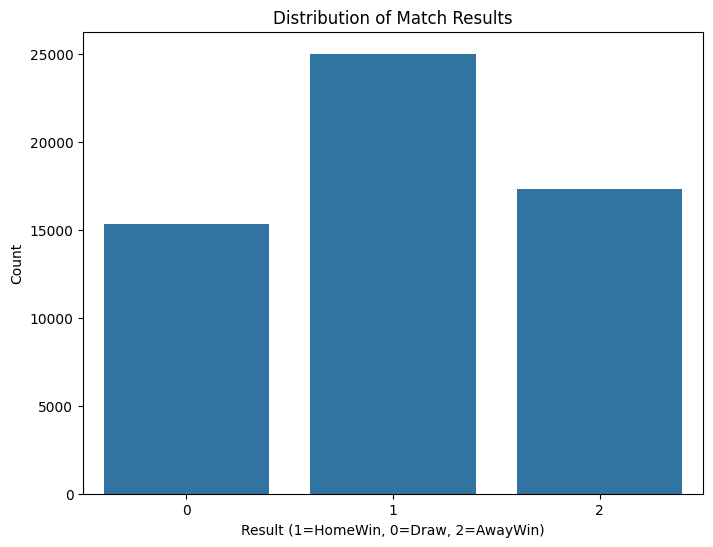

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(x='result', data=df)
plt.title('Distribution of Match Results')
plt.xlabel('Result (1=HomeWin, 0=Draw, 2=AwayWin)')
plt.ylabel('Count')
plt.show()


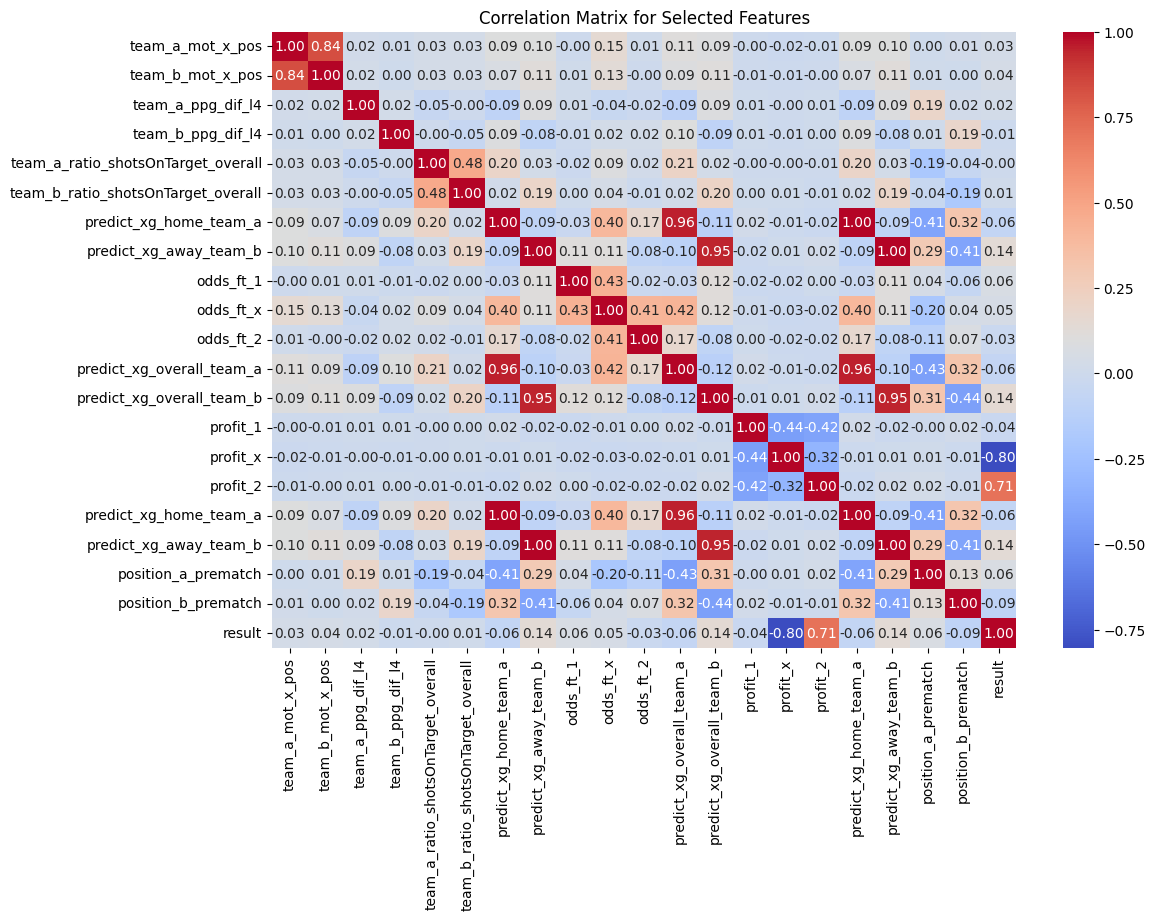

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_visualization.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Selected Features")
plt.show()

In [55]:


# Determine the predicted result based on the lowest odds
df['predicted_result'] = np.select(
    [df['odds_ft_1'] == df[['odds_ft_1', 'odds_ft_x', 'odds_ft_2']].min(axis=1),
     df['odds_ft_x'] == df[['odds_ft_1', 'odds_ft_x', 'odds_ft_2']].min(axis=1),
     df['odds_ft_2'] == df[['odds_ft_1', 'odds_ft_x', 'odds_ft_2']].min(axis=1)],
    [1, 0, 2], # HomeWin = 1, Draw = 0, AwayWin = 2
    default=np.nan)

# Compare predicted result with the actual result (HomeWin, Draw, AwayWin)
df['correct_prediction'] = np.where(df['predicted_result'] == df['result'], 1, 0)

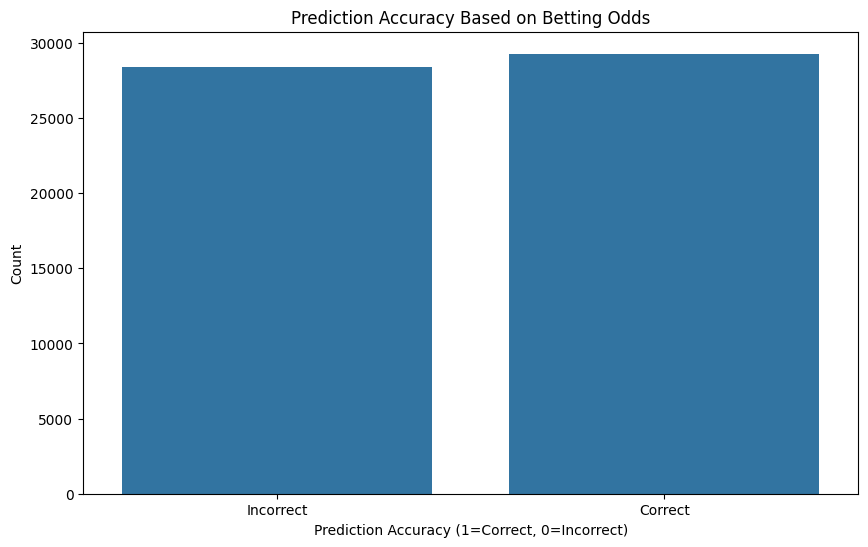

In [56]:
# Visualize how well the odds-based prediction matches the actual result
plt.figure(figsize=(10, 6))
sns.countplot(x='correct_prediction', data=df)
plt.title('Prediction Accuracy Based on Betting Odds')
plt.xlabel('Prediction Accuracy (1=Correct, 0=Incorrect)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Incorrect', 'Correct'])
plt.show()


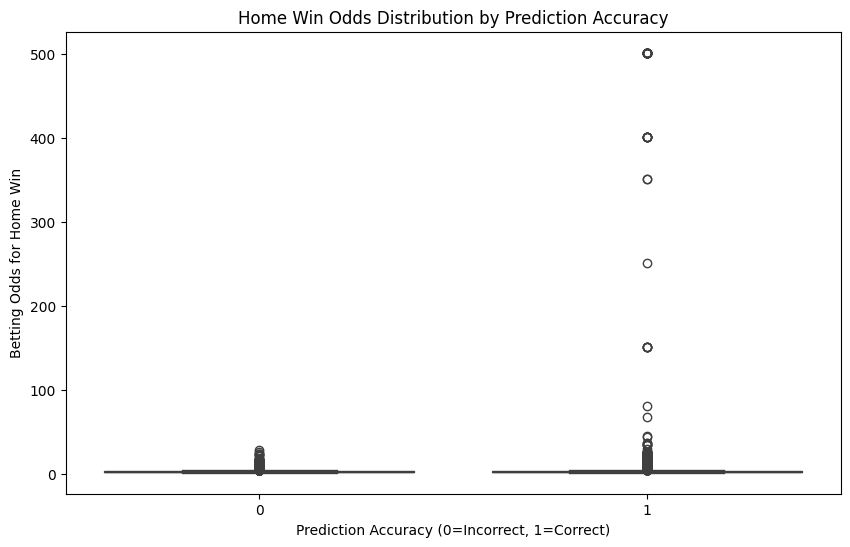

In [57]:
# (Optional) Show the distribution of odds for correct vs incorrect predictions
plt.figure(figsize=(10, 6))
sns.boxplot(x='correct_prediction', y='odds_ft_1', data=df)
plt.title('Home Win Odds Distribution by Prediction Accuracy')
plt.xlabel('Prediction Accuracy (0=Incorrect, 1=Correct)')
plt.ylabel('Betting Odds for Home Win')
plt.show()

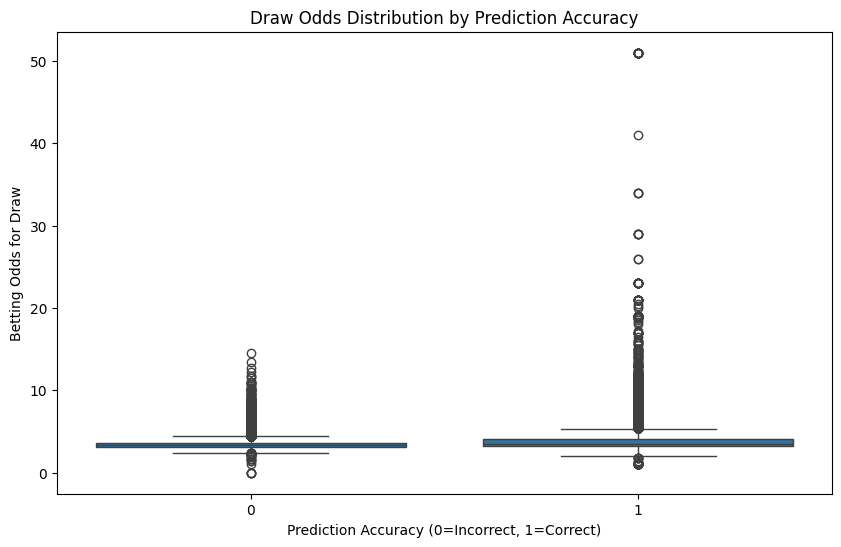

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='correct_prediction', y='odds_ft_x', data=df)
plt.title('Draw Odds Distribution by Prediction Accuracy')
plt.xlabel('Prediction Accuracy (0=Incorrect, 1=Correct)')
plt.ylabel('Betting Odds for Draw')
plt.show()

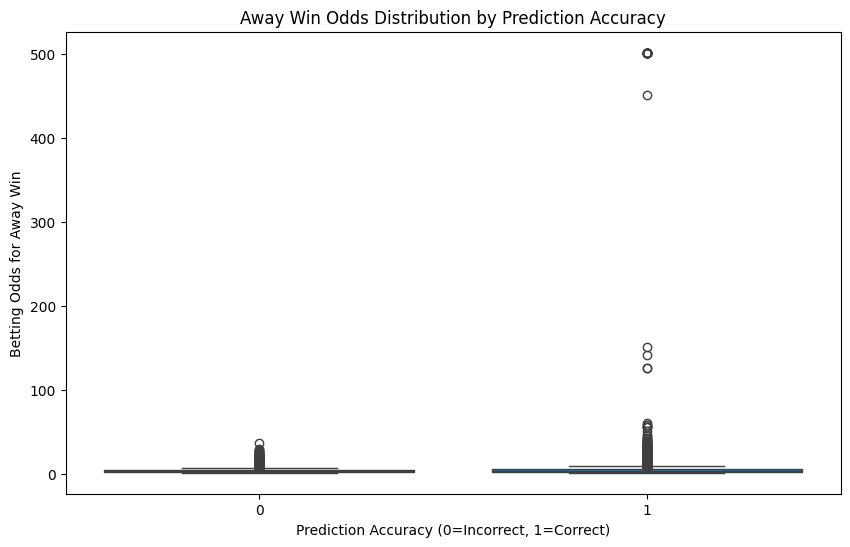

In [59]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='correct_prediction', y='odds_ft_2', data=df)
plt.title('Away Win Odds Distribution by Prediction Accuracy')
plt.xlabel('Prediction Accuracy (0=Incorrect, 1=Correct)')
plt.ylabel('Betting Odds for Away Win')
plt.show()

<div style="font-size: 30px; color: white;">
    <ul>
        WEEK 2.
</div>

<div style="font-size: 20px; color: white;">
    <ul>
        Predicting the result, just by looking at it's betting odds
</div>

In [60]:
# Predict based on the smallest betting odds
def predict_outcome(row):
    # Compare the odds and predict the outcome (1=HomeWin, 0=Draw, 2=AwayWin)
    if row['odds_ft_1'] < row['odds_ft_x'] and row['odds_ft_1'] < row['odds_ft_2']:
        return 1  # HomeWin
    elif row['odds_ft_x'] < row['odds_ft_1'] and row['odds_ft_x'] < row['odds_ft_2']:
        return 0  # Draw
    else:
        return 2  # AwayWin

# Apply the prediction function to each row
df['predicted_result'] = df.apply(predict_outcome, axis=1)

# Compare predicted results with the actual results
# Calculate the number of correct predictions
correct_predictions = (df['predicted_result'] == df['result']).sum()
total_predictions = df.shape[0]
accuracy = correct_predictions / total_predictions

# Display results
print(f"Correct Predictions: {correct_predictions} / Total Predictions: {total_predictions}")
print(f"Accuracy: {accuracy:.4f}")

# View the predicted vs actual counts
predicted_vs_actual = pd.crosstab(df['predicted_result'], df['result'], rownames=['Predicted'], colnames=['Actual'])
print(predicted_vs_actual)


Correct Predictions: 29282 / Total Predictions: 57701
Accuracy: 0.5075
Actual         0      1     2
Predicted                    
0            137     66    73
1          10290  20320  8437
2           4902   4651  8825


In [61]:
df.columns

Index(['id', 'team_a_mot_x_pos', 'team_b_mot_x_pos', 'team_a_ppg_dif_l4',
       'team_a_ppg_dif_l6', 'team_b_ppg_dif_l4', 'team_b_ppg_dif_l6',
       'team_a_ratio_shotsOnTarget_overall', 'team_a_ratio_shotsOnTarget_l4',
       'team_a_ratio_shotsOnTarget_l6', 'team_b_ratio_shotsOnTarget_overall',
       'team_b_ratio_shotsOnTarget_l4', 'team_b_ratio_shotsOnTarget_l6',
       'predict_xg_overall_team_a', 'predict_xg_overall_team_b',
       'predict_xg_home_team_a', 'predict_xg_away_team_b',
       'team_a_xg_last4_prematch', 'team_b_xg_last4_prematch',
       'team_a_xga_last4_prematch', 'team_b_xga_last4_prematch',
       'position_a_prematch', 'position_b_prematch', 'team_a_shots_average',
       'team_b_shots_average', 'team_a_shots_average_l4',
       'team_b_shots_average_l4', 'team_a_shots_average_l6',
       'team_b_shots_average_l6', 'team_a_shots_overall_TSR',
       'team_b_shots_overall_TSR', 'team_a_shots_overall_l4_TSR',
       'team_b_shots_overall_l4_TSR', 'team_a_shots

<div style="font-size: 20px; color: white;">
    <ul>
        Applying KNN Algorithm.
</div>

In [108]:
# Prepare the features (X) and target (y)
X = df.drop(columns=[ 'id','result', 'profit_1', 'profit_x', 'profit_2','predicted_result','correct_prediction'])  # Drop result and prediction columns
#,'correct_prediction', 'predicted_result'
y = df['result']  # The target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [81]:
X.columns

Index(['team_a_mot_x_pos', 'team_b_mot_x_pos', 'team_a_ppg_dif_l4',
       'team_a_ppg_dif_l6', 'team_b_ppg_dif_l4', 'team_b_ppg_dif_l6',
       'team_a_ratio_shotsOnTarget_overall', 'team_a_ratio_shotsOnTarget_l4',
       'team_a_ratio_shotsOnTarget_l6', 'team_b_ratio_shotsOnTarget_overall',
       'team_b_ratio_shotsOnTarget_l4', 'team_b_ratio_shotsOnTarget_l6',
       'predict_xg_overall_team_a', 'predict_xg_overall_team_b',
       'predict_xg_home_team_a', 'predict_xg_away_team_b',
       'team_a_xg_last4_prematch', 'team_b_xg_last4_prematch',
       'team_a_xga_last4_prematch', 'team_b_xga_last4_prematch',
       'position_a_prematch', 'position_b_prematch', 'team_a_shots_average',
       'team_b_shots_average', 'team_a_shots_average_l4',
       'team_b_shots_average_l4', 'team_a_shots_average_l6',
       'team_b_shots_average_l6', 'team_a_shots_overall_TSR',
       'team_b_shots_overall_TSR', 'team_a_shots_overall_l4_TSR',
       'team_b_shots_overall_l4_TSR', 'team_a_shots_overa

In [82]:
k_values = range(1,41)  # k values range
error_rates = []

# Loop over different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    error = 1 - accuracy  # Error rate is 1 - accuracy
    error_rates.append(error)

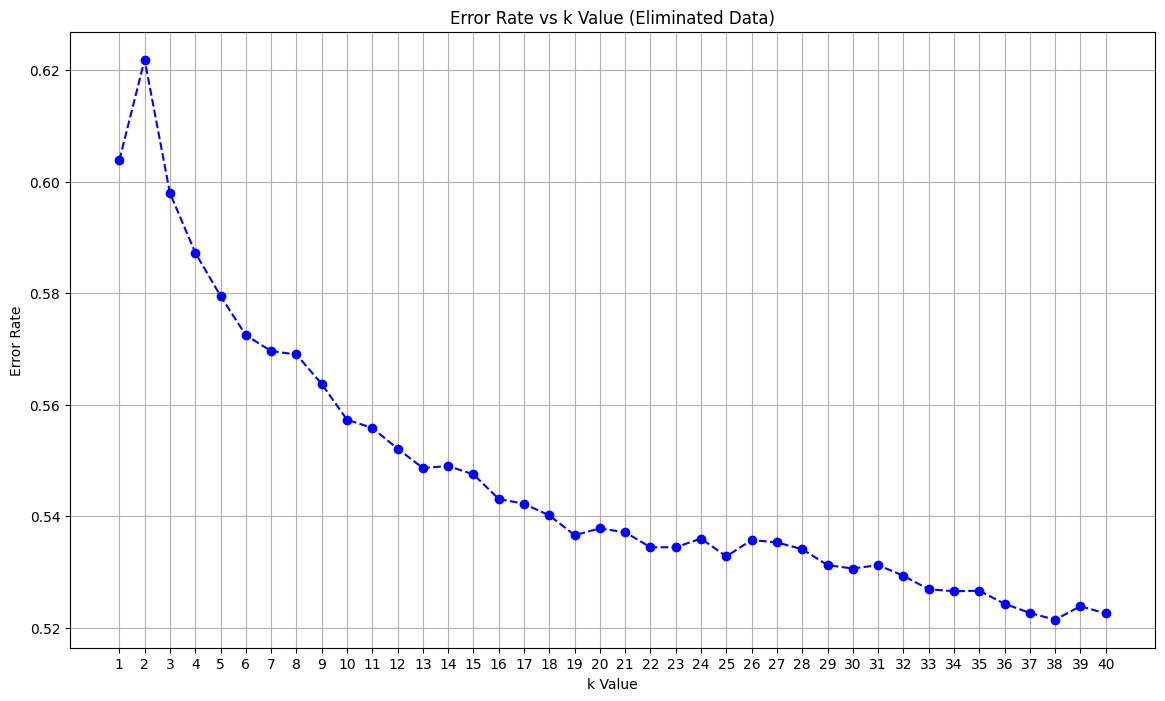

In [83]:
# Plotting the error rates for different k values
plt.figure(figsize=(14, 8))
plt.plot(k_values, error_rates, marker='o', linestyle='--', color='b')
plt.title('Error Rate vs k Value (Eliminated Data)')
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [84]:
k = 38
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.4786


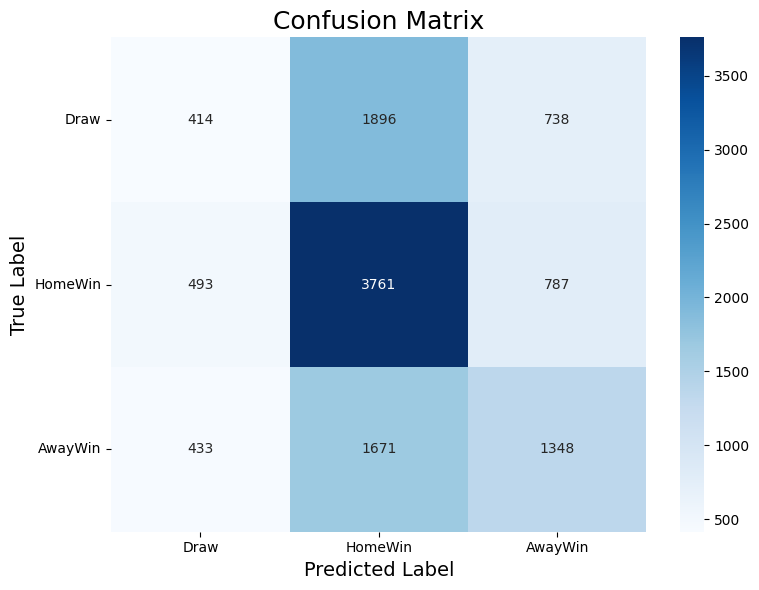

In [85]:
#  Confusion matrix to understand the misclassifications
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Draw','HomeWin', 'AwayWin'],
            yticklabels=['Draw', 'HomeWin', 'AwayWin'])

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<div style="font-size: 30px; color: white;">
    <ul>
        WEEK 3.
</div>

<div style="font-size: 20px; color: white;">
    <ul>
        Trying different Classification Algorithms to Decide which one to use.
</div>

In [87]:
# Train test splitting again.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

In [88]:
# Creating the Gredient Boosting Model
gbm = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.01,
    max_depth=3,
    random_state=54
)

In [89]:
# Training the model    
gbm.fit(X_train, y_train)

# Making Predictions
y_pred = gbm.predict(X_test)


In [90]:
# Evaluate the performances
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5120
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.03      0.05      3048
           1       0.52      0.81      0.64      5041
           2       0.49      0.50      0.49      3452

    accuracy                           0.51     11541
   macro avg       0.50      0.45      0.39     11541
weighted avg       0.50      0.51      0.44     11541



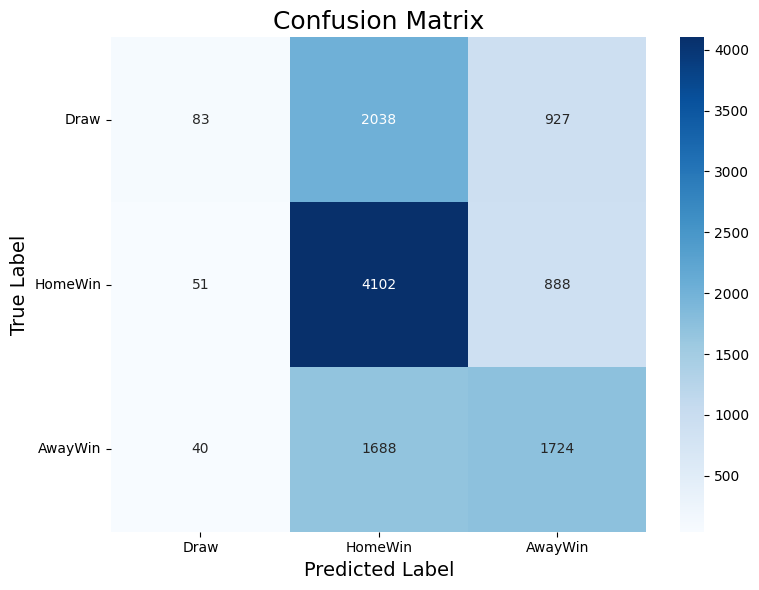

In [91]:
# Confusion matrix to understand the misclassifications
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Draw', 'HomeWin', 'AwayWin'],
            yticklabels=['Draw', 'HomeWin', 'AwayWin'])

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Random Forest Algorithm

In [92]:
rf = RandomForestClassifier(n_estimators=100, random_state=54)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.49943679057274065


Extreme Gredient Boosting Algorithm

In [93]:
xgb = XGBClassifier(n_estimators=100,
                    learning_rate=0.05, 
                    max_depth=3, 
                    random_state=54)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.5117407503682523


Logistic Regression Algorithm

In [94]:
lr = LogisticRegression(max_iter=10000, random_state=54)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.5100077982843775


In [95]:
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.01      0.03      3048
           1       0.52      0.83      0.64      5041
           2       0.49      0.49      0.49      3452

    accuracy                           0.51     11541
   macro avg       0.47      0.44      0.38     11541
weighted avg       0.48      0.51      0.43     11541



Support Vector Machine(SVM) Algorithm

In [96]:
svc = SVC(kernel='rbf', C=1, random_state=54)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))


SVM Accuracy: 0.5024694567195217


<div style="font-size: 30px; color: white;">
    <ul>
        WEEK 4.
</div>

Model Selection and Deciding the Final Model.

Since the Gredient Descent Algorithm gave the highest accuracy, We chose to implement it by scratch to test our model.

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

class GradientBoostingClassifierScratch:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.losses = []

    def fit(self, X, y):
        # One-hot encoding of class labels
        self.classes_ = np.unique(y)
        self.n_classes_ = len(self.classes_)
        y_one_hot = np.zeros((y.shape[0], self.n_classes_))
        for idx, class_label in enumerate(self.classes_):
            y_one_hot[:, idx] = (y == class_label).astype(float)

        # Initialize model predictions (probabilities)
        self.init_pred = np.full((X.shape[0], self.n_classes_), 1 / self.n_classes_)

        # Iteratively fit trees
        self.trees = [[] for _ in range(self.n_classes_)]
        for estimator_idx in range(self.n_estimators):
            residuals = y_one_hot - self.softmax(self.init_pred)

            for class_idx in range(self.n_classes_):
                tree = DecisionTreeRegressor(max_depth=self.max_depth)
                tree.fit(X, residuals[:, class_idx])
                self.trees[class_idx].append(tree)

                # Update predictions
                update = self.learning_rate * tree.predict(X)
                self.init_pred[:, class_idx] += update

    def predict(self, X):
        # Sum predictions from all trees
        pred = np.zeros((X.shape[0], self.n_classes_))
        for class_idx in range(self.n_classes_):
            for tree in self.trees[class_idx]:
                pred[:, class_idx] += self.learning_rate * tree.predict(X)

        # Take argmax of probabilities
        return np.argmax(self.softmax(pred), axis=1)

    def softmax(logits):
        exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)


In [ ]:
# Training and testing the model
gb = GradientBoostingClassifierScratch(n_estimators=100, learning_rate=0.1, max_depth=3)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

# Performance evaluating
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.5116541027640585


In [118]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.03      0.06      3048
           1       0.53      0.81      0.64      5041
           2       0.48      0.50      0.49      3452

    accuracy                           0.51     11541
   macro avg       0.48      0.45      0.40     11541
weighted avg       0.49      0.51      0.44     11541

